###1. Download the file research-papers.csv and perform given operations on it.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read the dataset

In [2]:
df = pd.read_csv('research-papers.csv')

In [3]:
df.shape

(53474, 10)

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'Title', 'Summary', 'Author', 'Link',
       'Publish Date', 'Update Date', 'Primary Category', 'Category'],
      dtype='object')

In [5]:
x = df['Summary']  # input data
y = df['Primary Category']    # output data

In [6]:
x.head()

0    Because of their occasional need to return to ...
1    Market price systems constitute a well-underst...
2    We describe an extensive study of search in GS...
3    As real logic programmers normally use cut (!)...
4    To support the goal of allowing users to recor...
Name: Summary, dtype: object

In [7]:
y

0          cs.AI
1          cs.AI
2          cs.AI
3          cs.AI
4          cs.AI
          ...   
53469    math.ST
53470    math.ST
53471    math.ST
53472    math.ST
53473    math.ST
Name: Primary Category, Length: 53474, dtype: object

Explore the output data

In [8]:
set(y)

{'astro-ph.CO',
 'astro-ph.EP',
 'astro-ph.GA',
 'astro-ph.HE',
 'astro-ph.IM',
 'astro-ph.SR',
 'comp-gas',
 'cond-mat',
 'cond-mat.dis-nn',
 'cond-mat.mes-hall',
 'cond-mat.mtrl-sci',
 'cond-mat.other',
 'cond-mat.quant-gas',
 'cond-mat.soft',
 'cond-mat.stat-mech',
 'cond-mat.str-el',
 'cond-mat.supr-con',
 'cs.AI',
 'cs.AR',
 'cs.CC',
 'cs.CE',
 'cs.CG',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.DB',
 'cs.DC',
 'cs.DL',
 'cs.DM',
 'cs.DS',
 'cs.ET',
 'cs.FL',
 'cs.GL',
 'cs.GR',
 'cs.GT',
 'cs.HC',
 'cs.IR',
 'cs.IT',
 'cs.LG',
 'cs.LO',
 'cs.MA',
 'cs.MM',
 'cs.MS',
 'cs.NA',
 'cs.NE',
 'cs.NI',
 'cs.OH',
 'cs.OS',
 'cs.PF',
 'cs.PL',
 'cs.RO',
 'cs.SC',
 'cs.SD',
 'cs.SE',
 'cs.SI',
 'cs.SY',
 'econ.EM',
 'econ.GN',
 'econ.TH',
 'eess.AS',
 'eess.IV',
 'eess.SP',
 'eess.SY',
 'gr-qc',
 'hep-ex',
 'hep-lat',
 'hep-ph',
 'hep-th',
 'math-ph',
 'math.AC',
 'math.AG',
 'math.AP',
 'math.AT',
 'math.CA',
 'math.CO',
 'math.CT',
 'math.CV',
 'math.DG',
 'math.DS',
 'math.FA',
 'math

In [9]:
len(set(y))

154

Explore the data

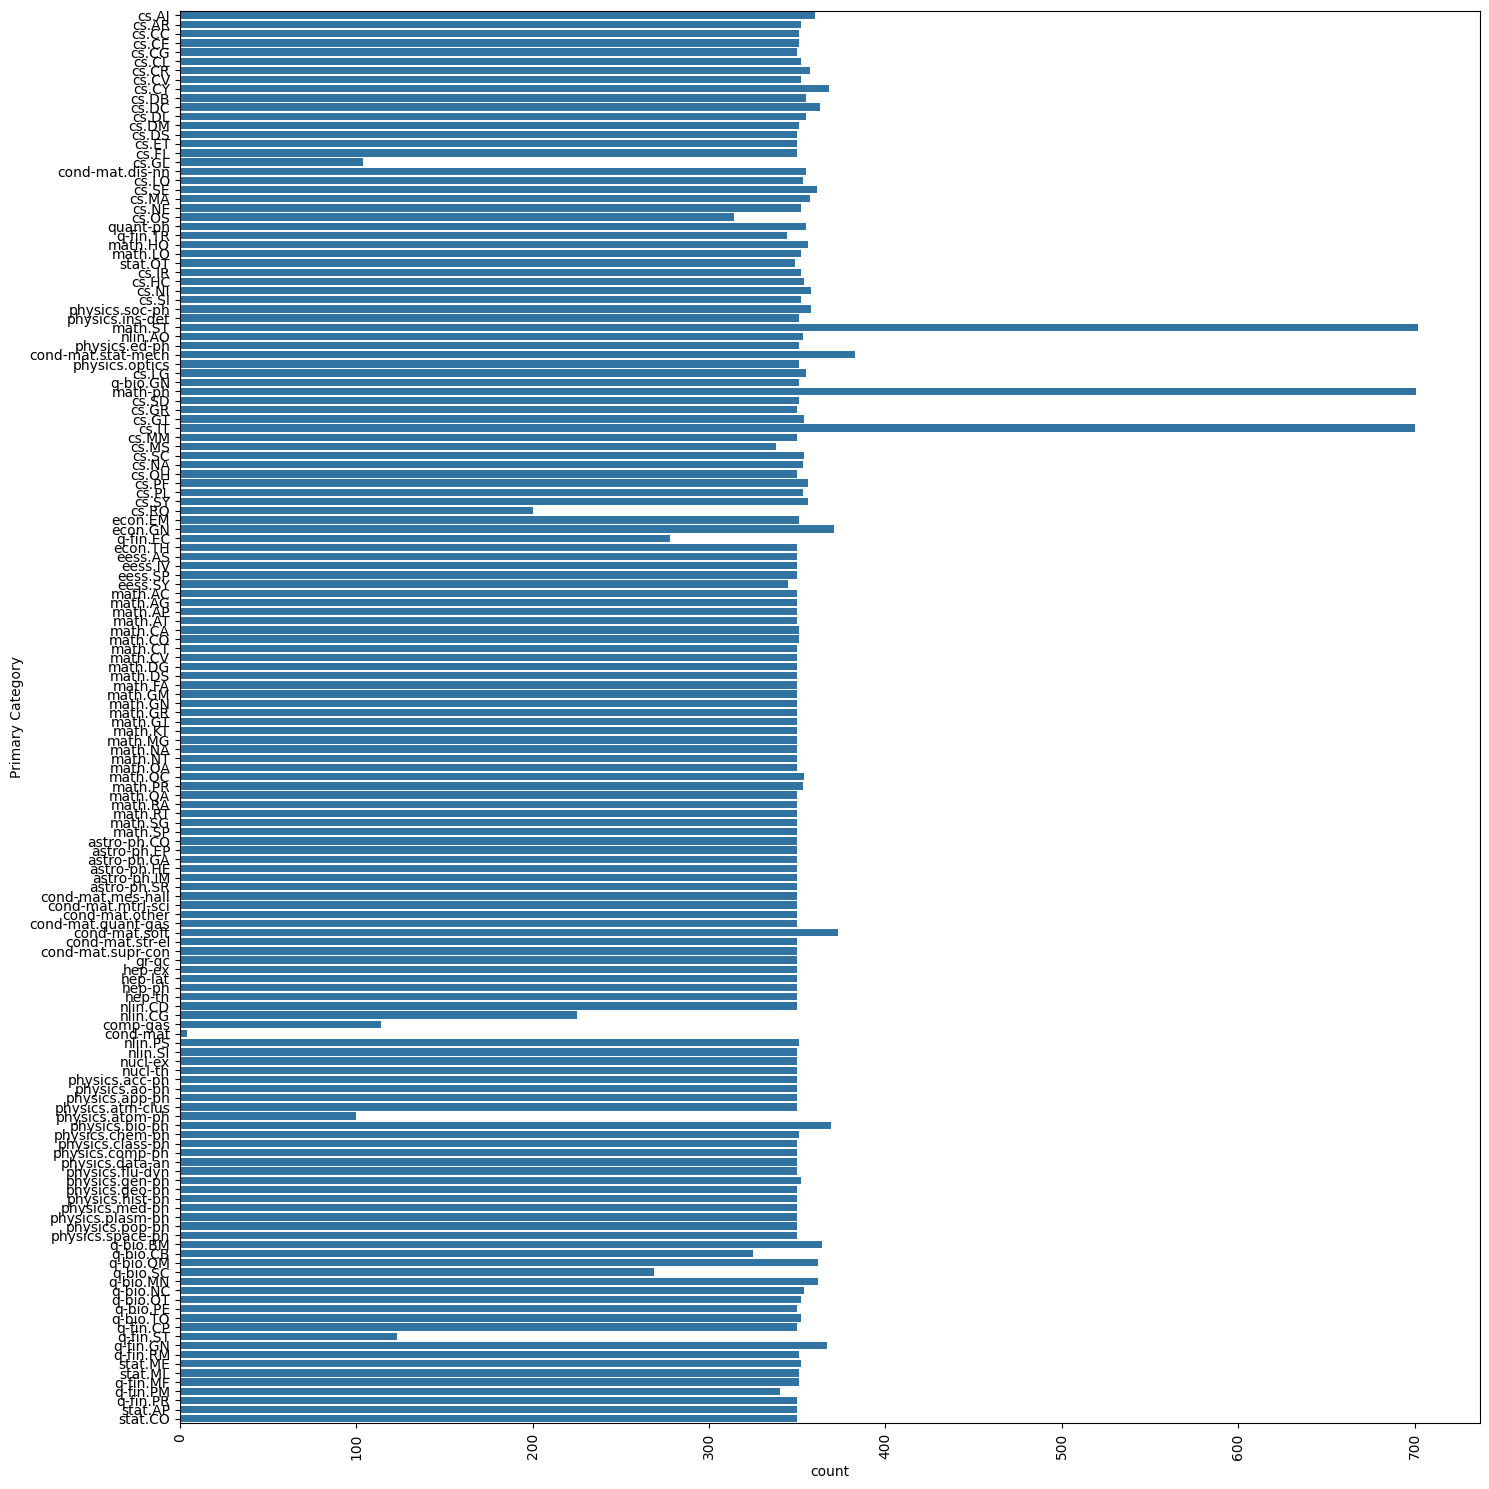

In [10]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y = df['Primary Category']);
plt.tight_layout()
plt.show()

In [11]:
y.value_counts()

Primary Category
math.ST               702
math-ph               701
cs.IT                 700
cond-mat.stat-mech    383
cond-mat.soft         373
                     ... 
q-fin.ST              123
comp-gas              114
cs.GL                 104
physics.atom-ph       100
cond-mat                4
Name: count, Length: 154, dtype: int64

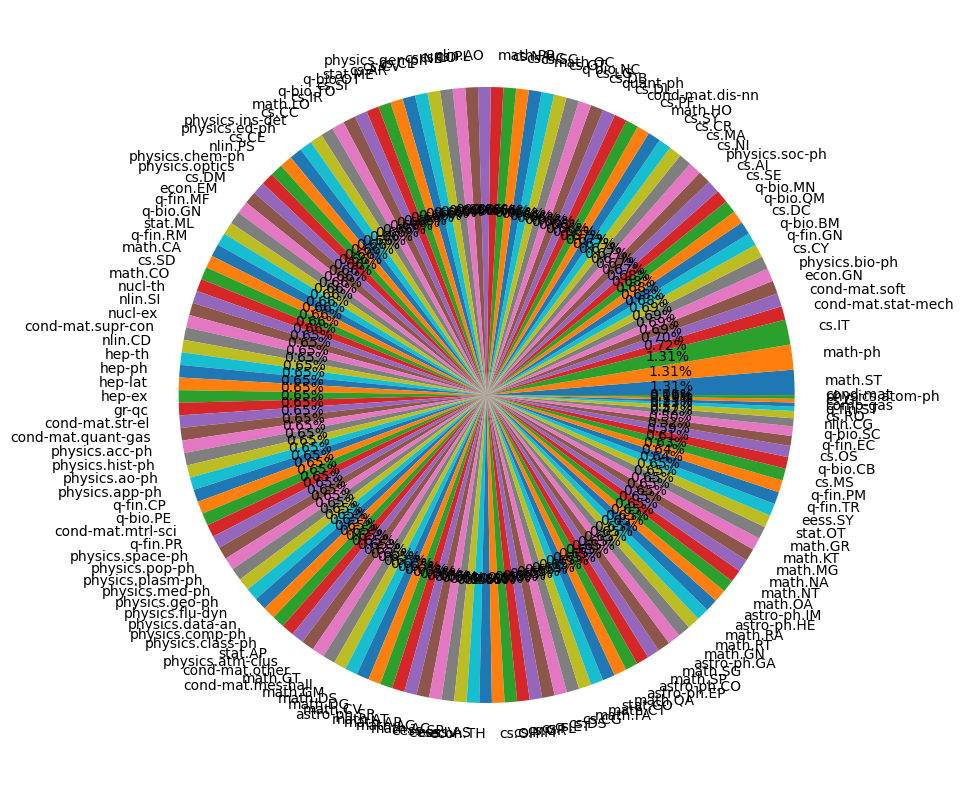

In [12]:
plt.figure(figsize=(10,10))
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

Data Preparation

Data Cleaning

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [15]:
ps = PorterStemmer()

In [16]:
import re, string

In [17]:
swords = stopwords.words('english')

In [18]:
def cleanResearch(ResearchText):
  tokens1 = word_tokenize(ResearchText)
  tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
  tokens3 = [x for x in tokens2 if x not in swords]
  tokens4 = [ps.stem(x) for x in tokens3]
  return tokens4


Checking if the code is working fine

In [19]:
ResearchText = 'Because of their occasional need to return to shallow points in a search tree, existing backtracking methods can sometimes erase meaningful progress toward solving a search problem.'

In [20]:
cleanResearch(ResearchText)

['occasion',
 'need',
 'return',
 'shallow',
 'point',
 'search',
 'tree',
 'exist',
 'backtrack',
 'method',
 'sometim',
 'eras',
 'meaning',
 'progress',
 'toward',
 'solv',
 'search',
 'problem']

TF*IDF Vectorizer

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [23]:
cleaned = x.apply(lambda a: cleanResearch(a))

In [24]:
cleaned = [str(item) for item in cleaned]

In [25]:
cleaned

["['occasion', 'need', 'return', 'shallow', 'point', 'search', 'tree', 'exist', 'backtrack', 'method', 'sometim', 'eras', 'meaning', 'progress', 'toward', 'solv', 'search', 'problem', 'paper', 'present', 'method', 'backtrack', 'point', 'move', 'deeper', 'search', 'space', 'therebi', 'avoid', 'difficulti', 'techniqu', 'develop', 'variant', 'backtrack', 'use', 'polynomi', 'space', 'still', 'provid', 'use', 'control', 'inform', 'retain', 'complet', 'guarante', 'provid', 'earlier', 'approach']",
 "['market', 'price', 'system', 'constitut', 'class', 'mechan', 'certain', 'condit', 'provid', 'effect', 'decentr', 'decis', 'make', 'minim', 'commun', 'overhead', 'program', 'approach', 'distribut', 'problem', 'solv', 'deriv', 'activ', 'resourc', 'alloc', 'set', 'comput', 'agent', 'comput', 'competit', 'equilibrium', 'artifici', 'economi', 'walra', 'provid', 'basic', 'construct', 'defin', 'comput', 'market', 'structur', 'protocol', 'deriv', 'correspond', 'price', 'equilibria', 'particular', 'reali

In [26]:
x_vect = tfidf.fit_transform(cleaned)


In [27]:
x_vect.shape

(53474, 50792)

In [28]:
tfidf.get_feature_names_out()


array(['aa', 'aaa', 'aaaattga', ..., 'zynga', 'zynq', 'zz'], dtype=object)

Cross Validation

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state=0)


In [31]:
x_train.shape

(40105, 50792)

In [32]:
x_test.shape


(13369, 50792)

Build the KNN model for classification with neighbors = 6

In [33]:
from sklearn.neighbors import KNeighborsClassifier


In [34]:
# create the object with neighbor = 6
knn = KNeighborsClassifier(n_neighbors=6)

In [35]:
# train the algorithm
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=6)

Evaluate the performance of algorithm

In [36]:
y_pred = knn.predict(x_test)

In [38]:
y_pred

array(['cs.OS', 'math.GR', 'cond-mat.supr-con', ..., 'cs.DM', 'cs.CE',
       'math.RT'], dtype=object)

In [39]:
# actual data
y_test

10727                 cs.OS
21091               math.GT
32445     cond-mat.supr-con
48519              q-fin.CP
12311                 cs.SD
                ...        
45015              q-bio.BM
31791    cond-mat.stat-mech
5572                  cs.FL
48730              q-fin.CP
24488               math.OA
Name: Primary Category, Length: 13369, dtype: object

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

<Figure size 1500x1500 with 0 Axes>

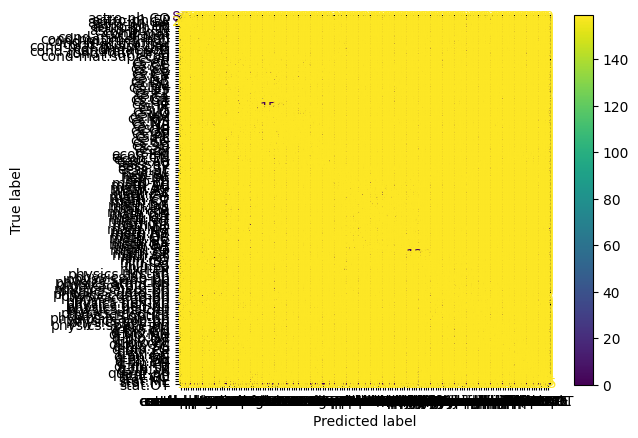

In [45]:
plt.figure(figsize = (15,15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [47]:
accuracy_score(y_test, y_pred) * 100

45.844864986162015

###2. Read the data and perform given operations

Read the file

In [48]:
sarcasm_cluster = []
with open('sarcasm-clusters.txt', 'r', encoding='utf-8') as f:
    reader = f.readlines()
    for row in reader:
      sarcasm_cluster.append(row)

In [49]:
sarcasm_cluster

["It feels like just a few days ago it was the last day of school . Now it's the end of July . 😐 \n",
 "I love my mom . No matter what we go through , no matter how much we argue , because I know , at the end , she'll always be there . \n",
 'Bump that music ... #imtryingtosleep \n',
 "Mexican and black jokes are pretty much the same . Once you've heard Juan , you've heard Jamal .\n",
 'How to find work you love :\n',
 '"@WolfpackAlan : You know what I like to do ? Answer my own questions . "" @elenecoetzer"\n',
 'You seem like a basketball player ! — I am Thank you !\n',
 'Just because you say Swag in every other sentence doesnt mean you have it . \n',
 "if i had my license the only thing i'd use it for is mcdonalds at 3am \n",
 'When people give me directions I tend to concentrate very hard on trying to look attentive and I forget to listen . \n',
 '@pitchfork @EODMofficial WE LOVE YOU ! STAY SAFE WHEREVER YOU ARE !\n',
 "RT Every country has an Independence Day except Britain becaus

Data Preparation

Clean, prepare and vectorize the data

In [50]:
import re, string

In [51]:
def cleantweet(tweet):
    tweet = re.sub('http\S+\s*', ' ', tweet)  # remove URLs
    tweet = re.sub('RT|cc', ' ', tweet)  # remove RT and cc
    tweet = re.sub('#\S+', ' ', tweet)  # remove hashtags
    tweet = re.sub('@\S+', ' ', tweet)  # remove mentions
    tweet = re.sub('[%s]' % re.escape(string.punctuation),' ',tweet)
    # remove punctuations
    tweet = re.sub(r'[^\x00-\x7f]',r' ', tweet) # remove unicode characters
    tweet = re.sub('\s+', ' ', tweet)
    # remove extra whitespace
    return tweet

In [52]:
cleaned_tweets = [cleantweet(tweet) for tweet in sarcasm_cluster]


In [53]:
cleaned_tweets

['It feels like just a few days ago it was the last day of school Now it s the end of July ',
 'I love my mom No matter what we go through no matter how much we argue because I know at the end she ll always be there ',
 'Bump that music ',
 'Mexican and black jokes are pretty much the same Once you ve heard Juan you ve heard Jamal ',
 'How to find work you love ',
 ' You know what I like to do Answer my own questions ',
 'You seem like a basketball player I am Thank you ',
 'Just because you say Swag in every other sentence doesnt mean you have it ',
 'if i had my license the only thing i d use it for is mcdonalds at 3am ',
 'When people give me directions I tend to concentrate very hard on trying to look attentive and I forget to listen ',
 ' WE LOVE YOU STAY SAFE WHEREVER YOU ARE ',
 ' Every country has an Independence Day except Britain because they re the one s everyone was seeking Independence from ',
 'Some days I practice positive thinking Other days I m not positive I am thinki

Vectorizing the data

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfidf = TfidfVectorizer()

In [56]:
#vectorize to tf*idf form
tweet_vectors = tfidf.fit_transform(cleaned_tweets)


In [57]:
tweet_vectors.shape

(51189, 31338)

In [58]:
len(tfidf.get_feature_names_out())

31338

Build the K-means clustering algorithm with 2 clusters.

In [59]:
from sklearn.cluster import KMeans


In [62]:
#build the k-means clustering algorithm with 2 clusters
km = KMeans(random_state=0, n_clusters=2)

Adding the labels

In [63]:
labels = km.fit_predict(tweet_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [65]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Showing the tweets with 0 and 1 label

In [66]:
df = pd.DataFrame(cleaned_tweets)
df['label'] = labels
df

,0,label
0,It feels like just a few days ago it was the l...,0
1,I love my mom No matter what we go through no ...,0
2,Bump that music,0
3,Mexican and black jokes are pretty much the sa...,1
4,How to find work you love,1
...,...,...
51184,My EX had one very annoying habit Breathing,0
51185,Some days you re the Titanic some days you re ...,1
51186,Congrats on the release of 25 let s hope Frank...,0
51187,doing my favorite thing crying,0


In [71]:
set(labels)

{0, 1}

In [86]:
#tweets with label 0
zero = df[labels==0]
zero

,0,label
0,It feels like just a few days ago it was the l...,0
1,I love my mom No matter what we go through no ...,0
2,Bump that music,0
8,if i had my license the only thing i d use it ...,0
9,When people give me directions I tend to conce...,0
...,...,...
51183,Vika will play against Ana and I won t watch a...,0
51184,My EX had one very annoying habit Breathing,0
51186,Congrats on the release of 25 let s hope Frank...,0
51187,doing my favorite thing crying,0


In [85]:
#tweets with label 1
one = df[labels==1]
one

,0,label
3,Mexican and black jokes are pretty much the sa...,1
4,How to find work you love,1
5,You know what I like to do Answer my own ques...,1
6,You seem like a basketball player I am Thank you,1
7,Just because you say Swag in every other sente...,1
...,...,...
51176,Frustration build up then you gotta release,1
51178,omg bestfriend you so cute,1
51179,James you were threatening to pee on him last ...,1
51180,Donald Trump on Oreos no longer being made in...,1


find and print sarcastic and non-sarcastic tweet's top 10 words each

In [109]:
#import FreqDist
from nltk import FreqDist

In [113]:
#Printing labels suggest zero = non-sarcastic & one = Sarcastic
#adding all the non-sarcastic words of text in one file
Non_sar = []
for j in zero[0]:
  for i in clean_text(j):
    Non_sar.append(i)
Non_sar

['feels',
 'like',
 'days',
 'ago',
 'last',
 'day',
 'school',
 'end',
 'july',
 'love',
 'mom',
 'matter',
 'go',
 'matter',
 'much',
 'argue',
 'know',
 'end',
 'always',
 'bump',
 'music',
 'license',
 'thing',
 'use',
 'mcdonalds',
 'people',
 'give',
 'directions',
 'tend',
 'concentrate',
 'hard',
 'trying',
 'look',
 'attentive',
 'forget',
 'listen',
 'every',
 'country',
 'independence',
 'day',
 'except',
 'britain',
 'one',
 'everyone',
 'seeking',
 'independence',
 'days',
 'practice',
 'positive',
 'thinking',
 'days',
 'positive',
 'thinking',
 'guys',
 'guys',
 'guys',
 'guys',
 'wake',
 'bingewatch',
 'excited',
 'sleep',
 'getting',
 'gas',
 'starting',
 'drive',
 'back',
 'okc',
 'wait',
 'home',
 'missing',
 'good',
 'old',
 'ok',
 'love',
 'bus',
 'smells',
 'like',
 'cat',
 'piss',
 'dirty',
 'laundry',
 'meet',
 'press',
 'roundtable',
 'collectively',
 'ignore',
 'fingerprints',
 'paris',
 'attacker',
 'came',
 'greece',
 'really',
 'bitch',
 'sinclair',
 'glad'

In [114]:
#Finding top 10 non-sarcastic words
freq = FreqDist(Non_sar)
freq.most_common(10)

[('love', 4019),
 ('like', 3096),
 ('day', 2181),
 ('get', 2063),
 ('people', 1926),
 ('great', 1804),
 ('good', 1729),
 ('u', 1719),
 ('one', 1608),
 ('time', 1473)]

In [116]:
#adding all the Sarcastic words of text in one file
Sar = []
for O in one[0]:
  for k in clean_text(O):
    Sar.append(k)
Sar

['mexican',
 'black',
 'jokes',
 'pretty',
 'much',
 'heard',
 'juan',
 'heard',
 'jamal',
 'find',
 'work',
 'love',
 'know',
 'like',
 'answer',
 'questions',
 'seem',
 'like',
 'basketball',
 'player',
 'thank',
 'say',
 'swag',
 'every',
 'sentence',
 'doesnt',
 'mean',
 'love',
 'stay',
 'safe',
 'wherever',
 'act',
 'change',
 'something',
 'du',
 'ring',
 'terms',
 'liking',
 'selfie',
 'could',
 'either',
 'mean',
 'nice',
 'picture',
 'friend',
 'want',
 'bend',
 'table',
 'never',
 'know',
 'took',
 'piece',
 'let',
 'never',
 'happen',
 'cristina',
 'yang',
 'class',
 'bay',
 'uhh',
 'noon',
 'wait',
 'noon',
 'thirty',
 'say',
 'care',
 'see',
 'hurt',
 'eyes',
 'admit',
 'bald',
 'stop',
 'fake',
 'tanning',
 'look',
 'ridiculous',
 'older',
 'men',
 'sexy',
 'go',
 'natural',
 'white',
 'girl',
 'drunk',
 'hit',
 'hate',
 'love',
 'suck',
 'dick',
 'minutes',
 'feel',
 'sting',
 'disappointment',
 'roommate',
 'expresses',
 'apathy',
 'towards',
 'favorite',
 'things',
 '

In [117]:
#finding top 10 sarcastic words
freq = FreqDist(Sar)
freq.most_common(10)

[('love', 1616),
 ('like', 1071),
 ('know', 877),
 ('get', 645),
 ('thank', 642),
 ('day', 542),
 ('people', 539),
 ('good', 520),
 ('much', 492),
 ('want', 476)]